# Data & Lib

In [15]:
from datetime import datetime
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso
from skforecast.model_selection import backtesting_forecaster, grid_search_forecaster
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

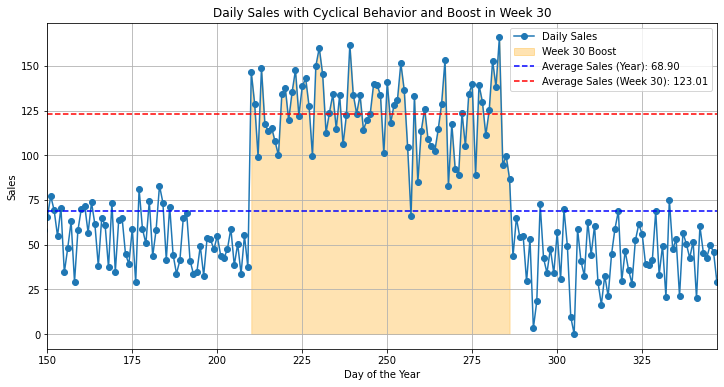

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Number of days
num_days = 365

# Generate day numbers
day_numbers = np.arange(1, num_days + 1)

# Generate a cyclic component with higher sales on weekends
cyclic_component = 10 * np.sin(2 * np.pi * day_numbers / 365)  # 1 cycle per year
weekend_effect = 10 * (np.sin(2 * np.pi * (day_numbers % 7) / 7) > 0.5)  # Higher sales on weekends

# Generate sales data: base value + cyclic component + weekend effect + random noise
sales_data = 50 + cyclic_component + weekend_effect + np.random.normal(0, 15, num_days)

# Add a boost to sales specifically during week 30
start_week_30 = 30 * 7  # Start day of week 30
end_week_30 = 41 * 7  # End day of week 30
boost_days = (day_numbers >= start_week_30) & (day_numbers < end_week_30)
sales_data[boost_days] += np.random.uniform(50, 100, boost_days.sum())  # Increased boost

# Ensure sales are always positive
sales_data = np.maximum(sales_data, 0)

# Create a DataFrame
df = pd.DataFrame({
    'Day': day_numbers,
    'Sales': sales_data
})

# Calculate average sales over the year and over week 30
average_sales_year = df['Sales'].mean()
average_sales_week_30 = df.loc[boost_days, 'Sales'].mean()

# Convert columns to numpy arrays
day_array = df['Day'].to_numpy()
sales_array = df['Sales'].to_numpy()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(day_array, sales_array, marker='o', label='Daily Sales')

# Highlight week 30
plt.fill_between(day_array[boost_days], sales_array[boost_days], color='orange', alpha=0.3, label='Week 30 Boost')

# Add horizontal lines for averages
plt.axhline(y=average_sales_year, color='blue', linestyle='--', label=f'Average Sales (Year): {average_sales_year:.2f}')
plt.axhline(y=average_sales_week_30, color='red', linestyle='--', label=f'Average Sales (Week 30): {average_sales_week_30:.2f}')

# Zoom in on week 30 range
plt.xlim([start_week_30 - 60, end_week_30 + 60])  # Adjust as needed

plt.title('Daily Sales with Cyclical Behavior and Boost in Week 30')
plt.xlabel('Day of the Year')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()
